In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image
import numpy as np

In [2]:


SIZE = 128

# Hàm đọc và tiền xử lý ảnh
def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')  # Đọc ảnh và chuyển sang RGB
    img = img.resize((SIZE, SIZE))  # Resize ảnh
    img = np.array(img) / 127.5 - 1.0  # Chuẩn hóa về [-1, 1]
    return tf.convert_to_tensor(img, dtype=tf.float32)

In [3]:
# Đọc ảnh mới
new_image_path = r"C:\Users\vuvie\Downloads\ship data\with_mask\with-mask-default-mask-seed9995.png"
new_image = load_and_preprocess_image(new_image_path)

# Thêm chiều batch vào (vì model yêu cầu đầu vào là một batch)
new_image = tf.expand_dims(new_image, axis=0)

In [4]:
# Load mô hình đã lưu (cả cấu trúc và trọng số)
loaded_generator = tf.keras.models.load_model(r"C:\Users\vuvie\Downloads\generator (1).h5")

In [5]:
generated_img = loaded_generator(new_image)

In [6]:
# Chuyển đổi từ [-1, 1] về [0, 1] để hiển thị
def denormalize(img):
    return (img + 1) / 2  # Chuyển từ [-1, 1] về [0, 1]

# Hàm lưu ảnh
def save_image(image, filename, output_dir):
    # Convert từ numpy array sang Image
    image_pil = Image.fromarray((image * 255).astype(np.uint8))  # Chuyển từ [0, 1] về [0, 255]
    # Lưu ảnh vào thư mục
    os.makedirs(output_dir, exist_ok=True)
    image_pil.save(os.path.join(output_dir, filename))


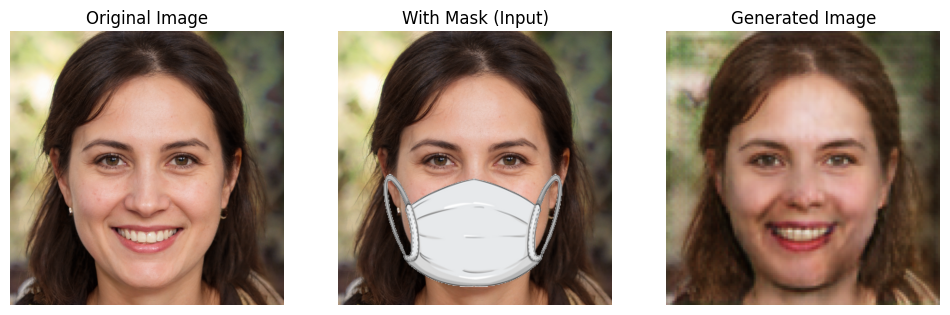

In [18]:
def main():

    # Đường dẫn ảnh mới có khẩu trang
    new_image_path = r"C:\Users\vuvie\Downloads\ship data\with_mask\with-mask-default-mask-seed9992.png"

    # Đường dẫn ảnh gốc không có khẩu trang
    original_image_path = r"C:\Users\vuvie\Downloads\ship data\without_mask\seed9992.png"

    # Load và xử lý ảnh mới có khẩu trang
    new_image = load_and_preprocess_image(new_image_path)
    new_image = tf.expand_dims(new_image, axis=0)

    # Load mô hình generator
    loaded_generator = tf.keras.models.load_model(r"C:\Users\vuvie\Downloads\generator_final.h5")

    # Tạo ảnh bằng generator
    generated_img = loaded_generator(new_image)

    # Hiển thị ảnh
    plt.figure(figsize=(12, 4))

    # Hiển thị ảnh gốc (không có khẩu trang)
    original_image = Image.open(original_image_path)
    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis('off')

    # Hiển thị ảnh với khẩu trang (input)
    new_image_display = Image.open(new_image_path)
    plt.subplot(1, 3, 2)
    plt.imshow(new_image_display)
    plt.title("With Mask (Input)")
    plt.axis('off')

    # Hiển thị ảnh được tạo ra bởi generator
    plt.subplot(1, 3, 3)
    generated_img_display = denormalize(generated_img[0].numpy())
    plt.imshow(generated_img_display)
    plt.title("Generated Image")
    plt.axis('off')

    plt.show()

main()